# Import the usual libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Import libraries to

1.   process numpy arrays
2.   work with data frames
3.   plot matplotlib graphs



In [1]:
?
?
?

## To import from Sklearn:
1.   pipeline (with aliases of the components)
2.   standard scaler
3.   principal component analysis class

In [2]:
?
?
?

SyntaxError: invalid syntax (<ipython-input-2-b9b1dbca857e>, line 2)

# Building a pipeline for performing PCA
build the following pipeline

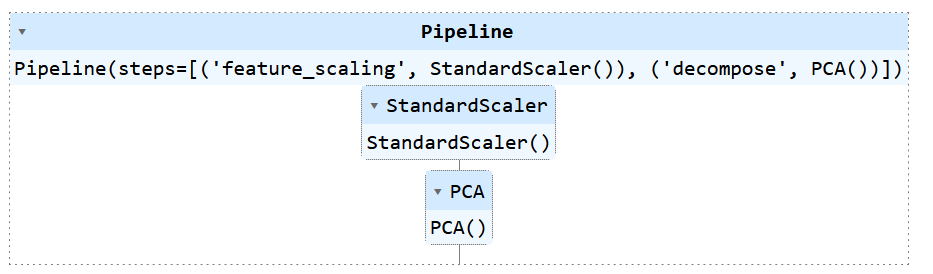

In [ ]:
pca_pipeline = ?

pca_pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()), ('decompose', PCA())])

# Load Breast Cancer Data

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer(as_frame=True)

In [ ]:
X, y = data['data'].to_numpy(), data['target'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

## Split the data into trian and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Finding contribution to variance from various principal components

## Perform PCA

In [ ]:
pca_results = ?

## Plot

1.   Variance Ration vs. Each of the pricipal component: Requires reading the documentation of PCA carefully. Does not require writing your own function, class, etc.
2.   Cumulative sum of variance contribution as a function of components: Requires small amount of coding on your own or using a numpy function



In [ ]:
component_count = ?
explained_variance = ?
cumsum_explained_variance = ?

## Plot the above

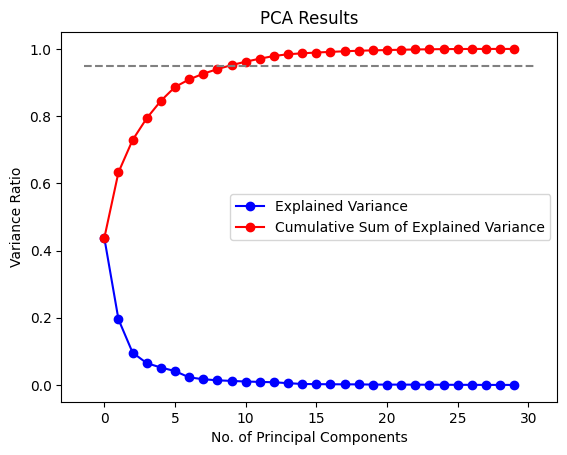

In [ ]:
# Start plotting
fig, ax = plt.subplots()

ax.set_title('PCA Results')
ax.set_xlabel('No. of Principal Components')
ax.set_ylabel('Variance Ratio')

# plot the explained variance for each of the principal components
# in the decreasing order of their explained variance
ax.plot(component_count, explained_variance,
        linestyle='-', marker='o', color='b',
        label='Explained Variance')

# plot the cumulative sum of the explained variance in the
# same order of the previous graph
ax.plot(component_count, cumsum_explained_variance,
        linestyle='-', marker='o', color='r',
        label='Cumulative Sum of Explained Variance')

# Draw a horizontal line to indicate 95% variance explainablity
ax.hlines(0.95, *ax.get_xlim(), colors='grey', linestyles='--')

ax.legend() # show legend
fig.show() # show the figure

# Visualizing KMeans Clusters
Use only the top two principal components from PCA for clustering

Import kmeans from sklearn

In [ ]:
?

Build the following pipeline

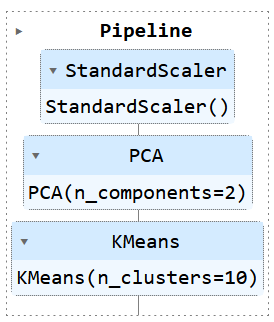

In [ ]:
clustering_pipeline = ?

clustering_pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('decompose', PCA(n_components=2)),
                ('cluster', KMeans(n_clusters=10))])

Fit the Pipeline

In [3]:
?

NameError: name 'clustering_pipeline' is not defined

Get the principal components (top 2)

In [ ]:
X_principal = ?

Get the cluster labels for each of the training data

In [ ]:
labels = ?

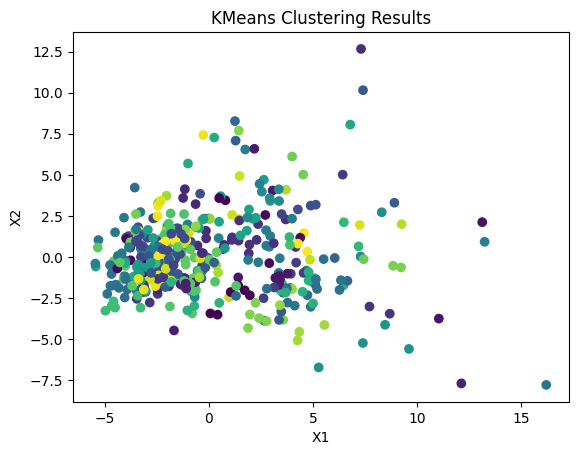

In [ ]:
# Start plotting
fig, ax = plt.subplots()

ax.set_title('KMeans Clustering Results')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# c must have the list of cluster labels
ax.scatter(?, ?, c=?)


# ax.legend() # show legend
fig.show() # show the figure

# Perform PCA + K-Means

Your pipeline must include the following steps:
1. Feature Standardization
2. Select the top n principal components that contribute to >= 95% of the total variance in the features
3. Perform k-means clustering taking number of cluster as a parameter.

To find the optimal number of cluster you will plot the Silhouette score vs. number of clusters



In [ ]:
from sklearn.metrics import silhouette_score, accuracy_score, make_scorer

## Build the following pipeline

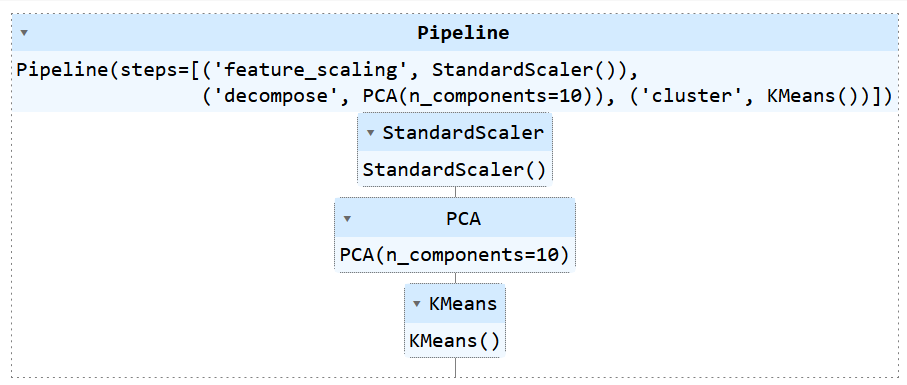

In [ ]:
clustering_pipeline = ?

clustering_pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('decompose', PCA(n_components=10)), ('cluster', KMeans())])

# Get the Silhouette score as a function of no. of clusters

Iterate through pipeline fitting by taking a different number of clusters for each iteration. Take all integers between 2 and 24 for nclusters

In [ ]:
score_list = []
ncluster_list = []
for i in range(2,25):
  ncluster_list.append(i)
  ?
  ?
  ?
  score_list.append(score)

Plot Silhouette score vs. number of clusters in K-Means (No code change needed)

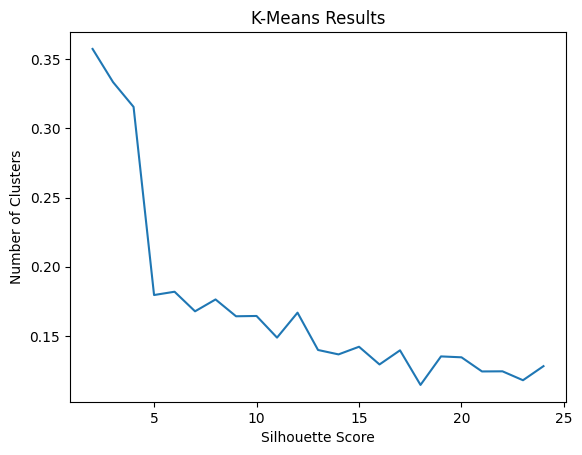

In [ ]:
# Start plotting
fig, ax = plt.subplots()

ax.set_title('K-Means Results')
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Number of Clusters')

ax.plot(ncluster_list, score_list)


# ax.legend() # show legend
fig.show() # show the figure

Select the appropriate number of clusters and build the final pipeline

In [ ]:
clustering_pipeline = ?
clustering_pipeline

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('decompose', PCA(n_components=10)),
                ('cluster', KMeans(n_clusters=100))])



1. Fit the clustering_pipeline
2. Get Principal components of the training data
2. Predict the cluster labels for each of training points

In [ ]:
? #fitting
X_principal_train = ?
cluster_label_train = ?

The following is a function that returns a classifier. This function needs two arguments, viz., the target labels and the cluster labels for the training data. Try to understand how it does it. No code change needed.

In [ ]:
def kmeans_classifier(y_train, cluster_label_train):
  # construct a contigency table
  cross_tab = pd.crosstab(index = y_train, columns = cluster_label_train)

  # find out what class of y does the cluster_label belong to
  # by using the maximum vote
  mapping = [cross_tab[col].idxmax() for col in cross_tab.columns]

  # construct and return the classifer based on the map obtained above
  def mapper(cluster_label_list):
    return np.array([mapping[c] for c in cluster_label_list])
  return mapper

In [ ]:
classifier = kmeans_classifier(y_train, cluster_label_train)

In [ ]:
clusters_label_test = clustering_pipeline.predict(X_test)

In [ ]:
accuracy_score(y_test, classifier(clusters_label_test))

0.951048951048951